#### Digital Imaging and Communications in Medicine (DICOM) Standard :

In [19]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [4]:
dicom_file = pydicom.read_file("/content/ID_0000_AGE_0060_CONTRAST_1_CT.dcm")
dicom_file

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [5]:
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

In [6]:
dicom_file.Rows

512

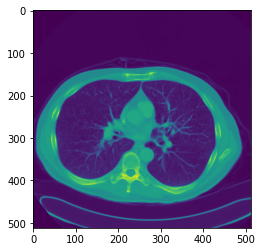

In [8]:
ct_img = dicom_file.pixel_array
plt.figure()
plt.imshow(ct_img)

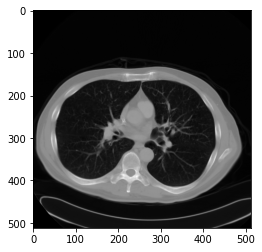

In [9]:
plt.imshow(ct_img, cmap="gray")

In [10]:
path_to_mri = Path("/content/mri_data")

all_files = list(path_to_mri.glob("*"))
all_files

[PosixPath('/content/mri_data/MR000024'),
 PosixPath('/content/mri_data/MR000003'),
 PosixPath('/content/mri_data/MR000012'),
 PosixPath('/content/mri_data/MR000021'),
 PosixPath('/content/mri_data/MR000013'),
 PosixPath('/content/mri_data/MR000010'),
 PosixPath('/content/mri_data/MR000014'),
 PosixPath('/content/mri_data/MR000005'),
 PosixPath('/content/mri_data/MR000009'),
 PosixPath('/content/mri_data/MR000002'),
 PosixPath('/content/mri_data/MR000023'),
 PosixPath('/content/mri_data/MR000025'),
 PosixPath('/content/mri_data/MR000001'),
 PosixPath('/content/mri_data/MR000000'),
 PosixPath('/content/mri_data/MR000016'),
 PosixPath('/content/mri_data/MR000020'),
 PosixPath('/content/mri_data/MR000006'),
 PosixPath('/content/mri_data/MR000015'),
 PosixPath('/content/mri_data/MR000008'),
 PosixPath('/content/mri_data/MR000026'),
 PosixPath('/content/mri_data/MR000018'),
 PosixPath('/content/mri_data/MR000017'),
 PosixPath('/content/mri_data/MR000007'),
 PosixPath('/content/mri_data/MR00

In [11]:
mri_data = []

for path in all_files:
  data = pydicom.read_file(path)
  mri_data.append(data)

In [13]:
for slice in mri_data[:5]:
  print(slice.SliceLocation)

143.999998928727
17.9999979772582
71.9999961590453
125.999997173645
77.9999962275740


In [14]:
mri_data = sorted(mri_data, key=lambda slice: slice.SliceLocation)

for slice in mri_data[:5]:
  print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


#### Create list of Pixel Arrays:

In [15]:
pixel_data = []

for slice in mri_data:
  pixel_data.append(slice.pixel_array)

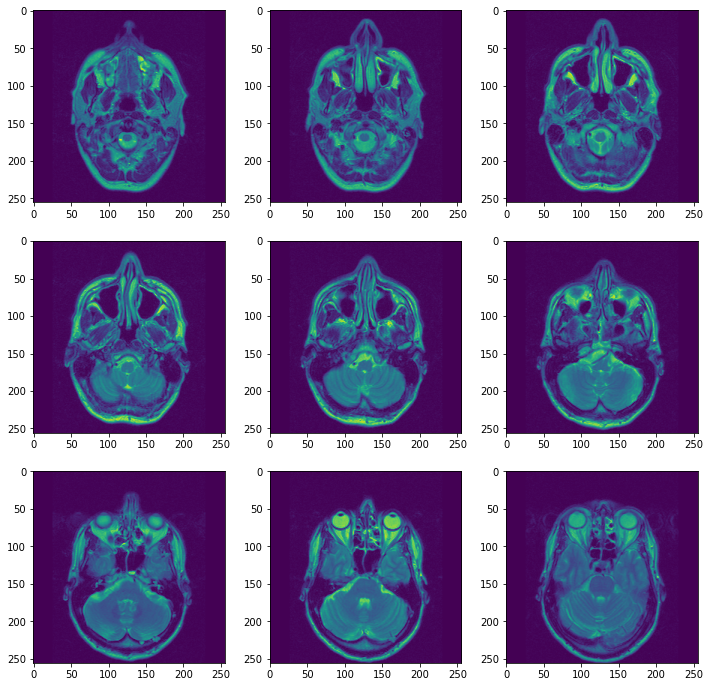

In [17]:
fig, axis = plt.subplots(3, 3, figsize=(12, 12))

slice_counter = 0

for i in range(3):
  for j in range(3):
    axis[i][j].imshow(pixel_data[slice_counter])
    slice_counter += 1

In [20]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs("/content/mri_data")
series_ids

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)

In [21]:
series_filenames = sitk.ImageSeriesReader.GetGDCMSeriesFileNames("/content/mri_data", series_ids[0])
series_filenames

('/content/mri_data/MR000000',
 '/content/mri_data/MR000001',
 '/content/mri_data/MR000002',
 '/content/mri_data/MR000003',
 '/content/mri_data/MR000004',
 '/content/mri_data/MR000005',
 '/content/mri_data/MR000006',
 '/content/mri_data/MR000007',
 '/content/mri_data/MR000008',
 '/content/mri_data/MR000009',
 '/content/mri_data/MR000010',
 '/content/mri_data/MR000011',
 '/content/mri_data/MR000012',
 '/content/mri_data/MR000013',
 '/content/mri_data/MR000014',
 '/content/mri_data/MR000015',
 '/content/mri_data/MR000016',
 '/content/mri_data/MR000017',
 '/content/mri_data/MR000018',
 '/content/mri_data/MR000019',
 '/content/mri_data/MR000020',
 '/content/mri_data/MR000021',
 '/content/mri_data/MR000022',
 '/content/mri_data/MR000023',
 '/content/mri_data/MR000024',
 '/content/mri_data/MR000025',
 '/content/mri_data/MR000026')

In [22]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_filenames)

image_data = series_reader.Execute()

mri_images = sitk.GetArrayFromImage(image_data)

mri_images.shape

(27, 256, 256)

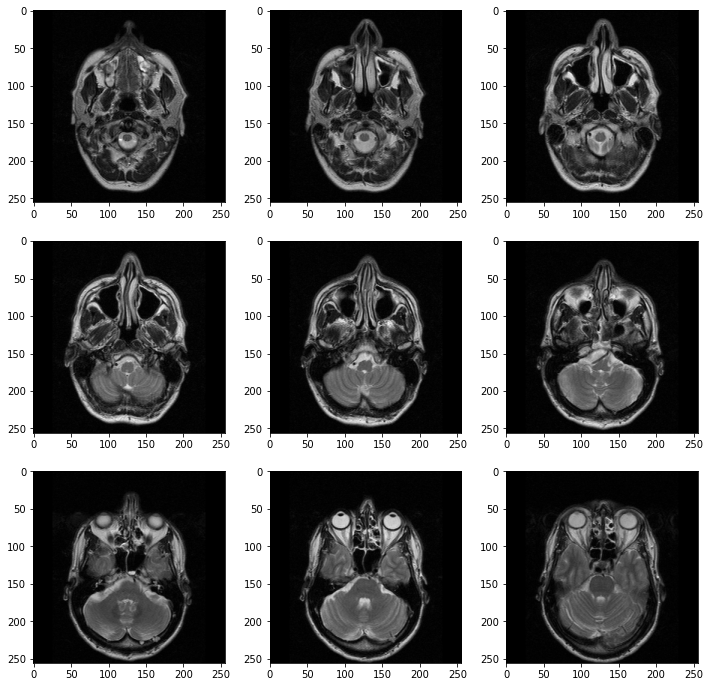

In [23]:
fig, axis = plt.subplots(3, 3, figsize=(12, 12))

slice_counter = 0

for i in range(3):
  for j in range(3):
    axis[i][j].imshow(mri_images[slice_counter], cmap="gray")
    slice_counter += 1